In [1]:
# Aca resolvemos una ODE con condicion inicial
# Problema 2 del articulo
# Artificial Neural Networks for Solving Ordinary and Partial Differential Equations

In [2]:
# importamos los paquetes necesarios para el entrenamiento
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Aca resolvemos la ecuacion diferencial 

\begin{align}
\frac{d}{dx} \psi(x) &= f(x,\psi)\\
\frac{d}{dx} \psi(x) &= \underbrace{e^{-\frac{x}{5}}\cos(x) - \frac{1}{5} \psi(x)}_{f(x,\psi)}
\end{align}

In [4]:
# que puede escribirse como

$\frac{d}{dt} x(t) = f(t,x)$ 

In [5]:
# definimos la red neuronal 
N = nn.Sequential(
    nn.Linear(1,50),
    nn.Sigmoid(),
    nn.Sigmoid(),
    nn.Linear(50,1,bias=False))

In [6]:
A = 0

In [7]:
Psi_estimate = lambda x: A+x*N(x) # Se define de esta manera tal que Psi(0) = A + 0*N(0) o si se quiere
# donde N es la red neural

In [8]:
# ahora definimos la funcion f(.)
f = lambda x,Psi: torch.exp(-x/5)*torch.cos(x)-Psi/5
# f = lambda t,x: torch.exp(-t/5)*torch.cos(t)-x/5 (con la otra notacion)

In [9]:
def loss(x):
    x.requires_grad = True
    outputs = Psi_estimate(x)
    Psi_estimate_x = torch.autograd.grad(outputs,x, grad_outputs=torch.ones_like(outputs),create_graph=True)[0] # esta es la derivada de Psi con respecto a x, i.e., dPsi/dx
    return torch.mean((Psi_estimate_x-f(x,outputs))**2)

In [10]:
optimizer = torch.optim.LBFGS(N.parameters())

In [12]:
x = torch.Tensor(np.linspace(0,2,100)[:,None])

In [13]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

for i in range(10):
    optimizer.step(closure)

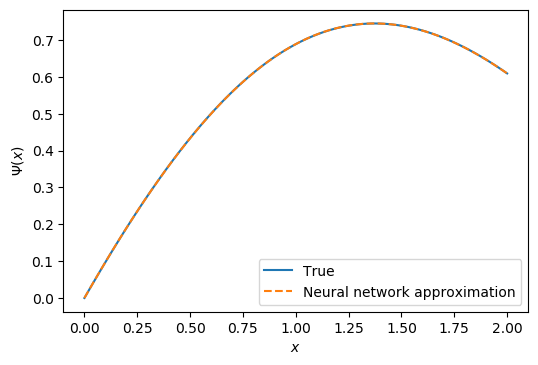

In [15]:
xx = np.linspace(0,2,100)[:,None]

with torch.no_grad():
    yy = Psi_estimate(torch.Tensor(xx)).numpy()
    
yt = np.exp(-xx/5)*np.sin(xx)

fig, ax = plt.subplots(dpi=100)
ax.plot(xx,yt,label='True')
ax.plot(xx,yy,'--',label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$\Psi(x)$')
plt.legend(loc='best')